## Domácí úkol - Batoh

Za domácí úkol budete mít vyřešit pomocí evolučního algoritmu problém batohu. Ten spočívá v tom, že máme batoh kapacity K a N předmětů, každý s cenou c<sub>i</sub> a objemem v<sub>i</sub> a chceme vybrat takové věci, abychom maximalizovali zisk a zároveň abychom nepřekročili kapacitu batohu. 

Vstupní data máte ve složce *domaci_ukol_data*. Obsahuje čtyři soubory s daty a dva s výsledky. Na první řádce souboru s daty je vždy počet předmětů a kapacita batohu oddělené mezerou, každý další následující řádek obsahuje cenu a objem předmětu taktéž oddělené mezerou. První dva soubory slouží pro snažší odladění evolučního algoritmu a obsahují i k sobě extra soubory s optimálním řešením. Na dalších dvou máte za úkol algoritmus pustit a výsledky na nich naměřené mi poslat. 

Napište tedy nějaký svůj evoluční algoritmus, který bude řešit problém batohu a pusťte ho na vstupních datech. Svůj kód, popis evolučního algoritmu (zvolené evoluční operátory, kódování jedince, atd.) a rozbor výsledků, včetně nejlepšího dosaženého skóre i s jejich odůvodněním mi pošlete emailem do stanoveného deadline.  Pro sepsání popisu vašeho evolučního algoritmu, parametrů evoluce, zvolené reprezentace jedince a rozboru výsledků použijte [tento template](https://github.com/kackamac/Prirodou-inspirovane-algoritmy/blob/master/04_spojita_reprezentace/DU1_evolucni_algoritmy.pdf).

##### Importy

In [1]:
import array
import random
import numpy as np
import math
import matplotlib.pyplot as plt

from deap import algorithms
from deap import base
from deap import creator
from deap import tools

Inicializácia random itemov a veľkosť batohu

In [2]:
# random.seed(64)
random.seed()
items_count = 20

weight_bounds = (10,200)
price_bounds = (10,200)

weights = random.sample(range(weight_bounds[0],weight_bounds[1]), items_count)
prices = random.sample(range(price_bounds[0],price_bounds[1]), items_count)

max_weight = 1000

Načítanie batohu zo súboru

In [3]:
#import weights and prices from txt file

def load_input_data(file_path):

    weights = []
    prices = []

    with open(file_path) as file:
        line_split = file.readline().split(" ")
        items_count = int(line_split[0])
        max_weight = int(line_split[1])
        for i in range(items_count):
            line_split = file.readline().split(" ")
            prices.append(int(line_split[0]))
            weights.append(int(line_split[1]))

    return weights, prices, max_weight

### Sedond try - permutation individual

#### fitness funkcia 
berieme predmety v poradí permutácie, kým nenaplníme batoh. Ostatné zahodíme

In [4]:
def fitness_batoh_perm(individual):
    total_price = 0
    total_weight = 0
    for item in individual:
        total_weight += weights[item]
        if total_weight > max_weight:
            return total_price,
        total_price += prices[item]
    return total_price,

#### mutácia
náhodný počet transpozícií od 1 do transposition_count.

In [5]:
def mut_transposition(individual, indv_size, transposition_count):
    count = random.randint(1, transposition_count)

    for i in range(count):
        pos_1 = random.randint(0, indv_size - 1)
        pos_2 = random.randint(0, indv_size - 1)

        individual[pos_1], individual[pos_2] = individual[pos_2], individual[pos_1]

    return individual,

#### Toolbox a deap prostredie
- mutácia - PMX
- selekcia - tournament s tromi kolami

In [6]:
weights, prices, max_weight = load_input_data(file_path = "./domaci_ukol_data/input_data_1000.txt")
indv_size = len(weights)

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()

toolbox.register("indices", random.sample, range(indv_size), indv_size)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)

toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", fitness_batoh_perm)

# toolbox.register("mate", tools.cxPartialyMatched)
toolbox.register("mate", tools.cxUniformPartialyMatched, indpb = 0.1)
toolbox.register("mutate", mut_transposition, indv_size=indv_size, transposition_count = 20)
toolbox.register("select", tools.selTournament, tournsize = 3)

#### Evolučný algoritmus
- parametry
- štatistiky
- hall of fame (najlepší jedinec)

In [7]:
POP_SIZE = 500
GEN_COUNT = 5_000


pop = toolbox.population(n=POP_SIZE)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.7, mutpb=0.4, ngen=GEN_COUNT,
                               stats=stats, halloffame=hof, verbose=True)

print(hof)
print(fitness_batoh_perm(hof[0]))

gen	nevals	avg    	std    	min 	max 
0  	500   	4698.27	1250.53	1715	8615
1  	394   	5774.4 	1055.27	3080	8910
2  	421   	6395.26	1046.23	2996	9490
3  	425   	6996.54	1029.28	3818	10508
4  	404   	7404.81	1019.02	3769	10664
5  	405   	7896.54	1055.58	4727	11626
6  	392   	8306.56	1094.02	3841	12178
7  	404   	8782.81	1068.8 	4938	12028
8  	406   	9239.6 	1150.17	4846	12283
9  	408   	9575.05	1156.64	5376	12360
10 	406   	9912.61	1266.66	5431	12944
11 	420   	10320.8	1322.36	5113	14603
12 	394   	10889.8	1321.8 	5673	14603
13 	397   	11260.4	1365.27	5758	14603
14 	408   	11655.2	1407.81	6357	15521
15 	422   	12210.7	1419.31	7956	15826
16 	399   	12715.7	1411.85	7360	16095
17 	415   	13146.9	1500.66	5331	16753
18 	414   	13624.2	1537.66	7156	17501
19 	415   	14207.5	1401.41	6336	17935
20 	408   	14700.9	1515.14	8862	19554
21 	403   	15197.2	1385.84	9635	19554
22 	401   	15638.9	1368.62	10527	19554
23 	400   	16043.5	1470.34	10600	19554
24 	415   	16382.5	1462.02	9772 	20745
25 	385   	16

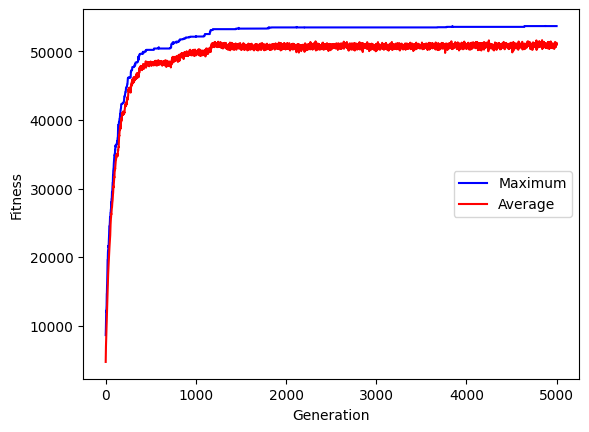

In [9]:
gen = log.select("gen")
maxs = log.select("max")
avgs = log.select("avg")

import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
line1 = ax1.plot(gen, maxs, "b-", label="Maximum")
ax1.set_xlabel("Generation")
ax1.set_ylabel("Fitness")


line2 = ax1.plot(gen, avgs, "r-", label="Average")

lns = line1 + line2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc="center right")

plt.show()

************************************************************************************************************************************
2000 jedinecov, 5000 generácií

- algorithms.eaSimple
- cxpb=0.7, mutpb=0.4
- transposition_count = 20
- toolbox.register("select", tools.selTournament, tournsize = 3)
- toolbox.register("mate", tools.cxUniformPartialyMatched, indpb = 0.1)
- toolbox.register("mutate", mut_transposition, indv_size=indv_size, transposition_count = 20)

[[855, 269, 13, 914, 669, 245, 38, 822, 48, 849, 657, 737, 53, 476, 937, 379, 273, 137, 830, 446, 147, 121, 945, 494, 421, 463, 37, 732, 334, 599, 743, 736, 382, 6, 10, 992, 967, 986, 249, 480, 32, 25, 775, 469, 603, 216, 254, 573, 426, 473, 821, 770, 903, 610, 419, 151, 347, 362, 493, 987, 845, 373, 708, 989, 751, 824, 281, 146, 612, 134, 539, 60, 886, 215, 592, 703, 739, 786, 23, 716, 483, 611, 890, 555, 965, 651, 537, 909, 878, 729, 329, 931, 975, 766, 438, 43, 363, 771, 418, 927, 437, 380, 745, 150, 19, 988, 133, 454, 375, 780, 346, 246, 420, 496, 90, 968, 601, 196, 204, 59, 629, 713, 585, 803, 230, 460, 492, 582, 277, 619, 873, 367, 107, 404, 563, 735, 406, 664, 723, 648, 368, 163, 100, 575, 513, 349, 201, 951, 623, 191, 356, 490, 644, 837, 320, 697, 511, 659, 801, 219, 502, 84, 799, 572, 466, 55, 674, 83, 836, 715, 606, 712, 654, 865, 615, 229, 441, 551, 544, 596, 298, 442, 912, 126, 159, 283, 832, 844, 44, 359, 607, 826, 222, 499, 625, 210, 804, 360, 31, 792, 765, 71, 464, 520, 842, 869, 264, 853, 285, 819, 972, 383, 910, 345, 28, 663, 97, 962, 3, 614, 276, 252, 255, 868, 790, 879, 27, 344, 720, 505, 934, 616, 272, 618, 174, 634, 455, 186, 370, 881, 237, 260, 366, 417, 800, 645, 817, 602, 542, 117, 105, 581, 1, 158, 351, 541, 411, 414, 952, 407, 135, 640, 391, 318, 95, 750, 696, 535, 310, 999, 172, 261, 725, 549, 752, 459, 342, 547, 810, 864, 562, 190, 8, 162, 682, 976, 176, 783, 244, 529, 841, 794, 213, 702, 109, 364, 772, 33, 858, 851, 709, 867, 5, 305, 153, 144, 724, 170, 427, 322, 348, 741, 462, 897, 561, 444, 548, 813, 918, 138, 889, 733, 568, 524, 818, 829, 944, 112, 698, 714, 900, 156, 938, 408, 893, 477, 445, 694, 290, 178, 217, 66, 327, 180, 57, 638, 225, 495, 620, 684, 489, 132, 164, 759, 103, 982, 389, 263, 521, 504, 959, 395, 385, 18, 482, 808, 778, 595, 238, 809, 643, 820, 811, 838, 401, 486, 248, 7, 746, 913, 727, 636, 754, 122, 118, 558, 795, 949, 586, 921, 294, 450, 930, 381, 399, 666, 77, 430, 88, 311, 789, 588, 500, 65, 981, 343, 69, 514, 978, 726, 350, 299, 887, 852, 119, 184, 410, 266, 922, 719, 898, 353, 653, 566, 833, 203, 335, 93, 488, 423, 166, 167, 268, 136, 667, 279, 453, 232, 274, 961, 304, 29, 94, 152, 175, 509, 907, 292, 458, 576, 188, 208, 617, 662, 220, 744, 856, 300, 211, 939, 145, 896, 718, 567, 62, 686, 98, 81, 30, 271, 763, 422, 467, 722, 777, 769, 932, 198, 677, 613, 361, 574, 990, 784, 397, 221, 630, 884, 111, 749, 774, 631, 474, 963, 436, 371, 36, 384, 905, 501, 491, 452, 530, 194, 788, 235, 16, 755, 947, 278, 405, 86, 67, 413, 259, 781, 660, 843, 412, 531, 182, 434, 96, 705, 34, 257, 243, 807, 35, 507, 936, 291, 515, 110, 639, 685, 116, 756, 241, 646, 472, 554, 872, 17, 376, 899, 827, 860, 424, 974, 4, 394, 512, 75, 578, 649, 688, 840, 435, 557, 79, 764, 519, 925, 647, 321, 964, 323, 679, 633, 661, 139, 149, 587, 378, 565, 941, 287, 402, 377, 545, 748, 223, 621, 710, 731, 802, 740, 331, 747, 589, 823, 991, 485, 498, 11, 123, 439, 908, 518, 977, 604, 87, 207, 591, 115, 247, 681, 953, 825, 556, 301, 793, 45, 478, 600, 181, 72, 313, 233, 21, 24, 179, 26, 358, 456, 142, 240, 652, 431, 336, 468, 113, 187, 200, 114, 902, 570, 157, 928, 711, 250, 911, 15, 127, 717, 523, 876, 68, 812, 970, 73, 398, 297, 857, 286, 516, 605, 315, 695, 0, 120, 875, 129, 309, 871, 337, 231, 369, 958, 70, 678, 185, 415, 89, 998, 650, 642, 396, 289, 773, 946, 258, 148, 155, 742, 626, 641, 805, 189, 330, 738, 372, 78, 280, 815, 806, 251, 973, 597, 270, 980, 834, 106, 425, 527, 658, 131, 228, 9, 143, 205, 609, 926, 481, 234, 676, 317, 950, 387, 571, 2, 796, 761, 130, 508, 534, 275, 74, 262, 767, 691, 447, 236, 622, 517, 891, 866, 785, 768, 553, 325, 577, 195, 760, 564, 308, 593, 192, 326, 47, 355, 979, 839, 993, 546, 141, 193, 943, 757, 948, 392, 532, 956, 354, 525, 400, 984, 443, 296, 470, 904, 628, 340, 831, 303, 955, 510, 209, 497, 673, 798, 202, 306, 61, 670, 668, 797, 328, 997, 895, 487, 692, 538, 63, 448, 533, 92, 54, 916, 403, 265, 154, 177, 624, 124, 929, 212, 816, 782, 267, 49, 284, 324, 942, 627, 388, 672, 590, 966, 475, 41, 341, 859, 293, 655, 687, 917, 762, 352, 314, 433, 550, 506, 728, 386, 51, 924, 791, 996, 583, 239, 850, 282, 560, 173, 432, 256, 920, 128, 365, 734, 862, 50, 787, 580, 218, 39, 635, 522, 295, 307, 863, 693, 457, 288, 671, 484, 721, 125, 224, 969, 85, 56, 465, 690, 954, 680, 848, 637, 108, 253, 316, 540, 227, 46, 579, 449, 242, 52, 165, 971, 302, 700, 701, 226, 960, 847, 160, 814, 861, 779, 584, 985, 994, 471, 835, 528, 91, 339, 877, 183, 76, 552, 699, 632, 880, 393, 12, 409, 995, 214, 451, 479, 357, 338, 874, 758, 776, 169, 503, 14, 665, 919, 906, 99, 892, 706, 656, 40, 933, 102, 526, 894, 940, 543, 161, 333, 206, 374, 312, 58, 140, 870, 675, 683, 608, 22, 915, 82, 319, 594, 80, 854, 730, 429, 440, 888, 168, 882, 707, 536, 828, 689, 390, 461, 42, 416, 101, 901, 883, 332, 569, 704, 197, 957, 598, 935, 20, 846, 923, 885, 983, 428, 104, 64, 199, 559, 753, 171]]

- fitness: 54178
************************************************************************************************************************************

#### first try - binárny jedinci

max fitness (cena ju zvyšuje a váha prekročená cez max nosnosť batohu prináša postihy)

In [ ]:
def fitness_batoh_bin(individual):
    total_price = np.sum(np.array(individual) @ np.array(prices))
    total_weight = np.sum(np.array(individual) @ np.array(weights))

    if total_weight <= max_weight:
        return total_price,
    else:
        return 1,

Vytvorenie prostredia (knižnica Deap)

In [ ]:
weights, prices = load_input_data(file_path = "./domaci_ukol_data/input_data_100.txt")
indv_size = len(weights)

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", array.array, typecode='b', fitness=creator.FitnessMax)

toolbox = base.Toolbox()

toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, indv_size)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", fitness_batoh_bin)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.2)
toolbox.register("select", tools.selRoulette)

Final part

In [ ]:
pop = toolbox.population(n=500)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=200, 
                               stats=stats, halloffame=hof, verbose=True)